# 🌞 Solar Rooftop Analysis Tool (Google Cloud Vision API + Rules)

This Google Colab notebook analyzes a rooftop image using Google Cloud Vision API and provides basic solar panel recommendations based on detected labels.

In [30]:
# 📦 Step 1: Install required packages
!pip install -q requests

Saving Screenshot 2025-05-28 183019.png to Screenshot 2025-05-28 183019.png


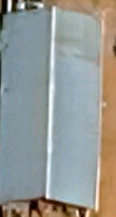

In [33]:
# 📤 Step 2: Upload a satellite rooftop image
from google.colab import files
uploaded = files.upload()

from PIL import Image
import IPython.display as display

image_path = next(iter(uploaded))
image = Image.open(image_path)
display.display(image)

In [34]:
# 🔍 Step 3: Analyze image using Google Cloud Vision API
import base64
import requests

# Replace with your actual API key
api_key = "your google map api key"

# Encode image
with open(image_path, "rb") as image_file:
    content = base64.b64encode(image_file.read()).decode()

# Prepare request body
url = f"https://vision.googleapis.com/v1/images:annotate?key={api_key}"
body = {
  "requests": [
    {
      "image": {"content": content},
      "features": [{"type": "LABEL_DETECTION", "maxResults": 10}]
    }
  ]
}

# Send request
response = requests.post(url, json=body)
labels = response.json()['responses'][0]['labelAnnotations']
if response.status_code == 200:
    try:
        labels = response.json()['responses'][0]['labelAnnotations']
        print("\n🔎 Detected Labels:")
        for label in labels:
            print(f"{label['description']} - Confidence: {round(label['score']*100, 2)}%")
    except (KeyError, IndexError):
        print("⚠️ No labels found or unexpected response format.")
else:
    # Print error message
    print(f"❌ API request failed with status code {response.status_code}")
    print(response.json())

print("\n🔎 Detected Labels:")
for label in labels:
    print(f"{label['description']} - Confidence: {round(label['score']*100, 2)}%")


🔎 Detected Labels:
Silver - Confidence: 70.1%
Plastic - Confidence: 66.44%

🔎 Detected Labels:
Silver - Confidence: 70.1%
Plastic - Confidence: 66.44%


In [ ]:
from google.colab import files
uploaded = files.upload()
#uploading your service account key file for the vertex ai

In [44]:
!pip install google-cloud-aiplatform -q
import os

# Replace with your actual filename
service_account_key = "your service account key json file name"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_key


In [48]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel

# Replace with your project ID
PROJECT_ID = "your google cloud file project id "
REGION = "us-central1"

vertexai.init(project=PROJECT_ID, location=REGION)

# Use the general gemini-1.0-pro model name
# The specific version for the region (us-central1) will be used automatically
model = GenerativeModel("the gemini model prescribed")

response = model.generate_content("Suggest solar panel options for a flat roof 140 sq ft.")
print(response.text)

Okay, let's explore solar panel options for a 140 sq ft flat roof.  This size roof will likely limit your system size, but let's see what we can do.

**First, let's estimate how many panels you can fit:**

*   **Panel Size:**  A typical solar panel is around 65-70 inches long and 40 inches wide (roughly 5.5 feet by 3.3 feet). That's around 18 square feet per panel.  High-efficiency panels might be slightly smaller.
*   **Available Space:** 140 sq ft total roof area
*   **Panel Placement Considerations:**
    *   **Setbacks:**  Most jurisdictions require setbacks from the roof edges for safety and fire access.  Assume 1-2 feet on each side. This will reduce your available area.
    *   **Walkways/Maintenance Access:** You'll want a small area to walk around the system for maintenance and cleaning.
    *   **Racking System:** The racking system will take up some additional space and needs room for installation.
    *   **Orientation:** Flat roofs allow optimal orientation. Usually, you'd

In [50]:
from vertexai.preview.generative_models import GenerativeModel, Part
import vertexai

def initialize_vertex(project_id: str, location: str = "us-central1"):
    vertexai.init(project=project_id, location=location)

def ask_gemini_for_recommendation(labels: list[str]) -> str:
    # Prepare a user-friendly prompt
    label_list = "\n".join(f"- {label}" for label in labels)
    prompt = (
        "You are a solar installation expert.\n"
        f"The following materials or features were detected:\n{label_list}\n\n"
        "Based on this, suggest if the surface is suitable for solar panel installation. "
        "Include panel type, panel count, area required, estimated cost, and ROI in years.just tell me the type of solar panel required ,cost for that solar panel and  roof top and tell me why a short description "
    )

    # Load Gemini Pro
    model = GenerativeModel("gemini model prescribed")
    chat = model.start_chat()
    response = chat.send_message(prompt)
    return response.text.strip()


# Example usage
if __name__ == "__main__":
    # STEP 1: Initialize
    initialize_vertex(project_id="your google cloud file project id")  # 🔁 replace this

    # STEP 2: Provide detected labels
    detected_labels = [
        "Silver",
        "Plastic"
    ]

    # STEP 3: Ask Gemini
    recommendation = ask_gemini_for_recommendation(detected_labels)

    # STEP 4: Show result
    print("\n⚡ Gemini Solar Recommendation:")
    print(recommendation)



⚡ Gemini Solar Recommendation:
Okay, based on the detected materials (Silver and Plastic), here's a breakdown of solar panel suitability and a relevant panel type recommendation:

**Assessment of Suitability**

The presence of silver and plastic alone doesn't directly determine roof suitability. However, they provide clues:

*   **Silver:** Likely refers to electrical wiring or connectors used within the existing roofing system, this is not the most significant factor to tell if it is suitable for solar panel.
*   **Plastic:** Could indicate a plastic-based roofing material (like PVC or TPO), flashing, or other components. The condition and type of plastic are crucial. some of the plastic is not recommended to install solar panel due to lack of stablity and the high temperature can affect the plastic based.

**Important Considerations Before Installation:**

1.  **Roof Material Confirmation:**  It's IMPERATIVE to identify the exact roofing material and its condition before proceeding.